In [110]:
import cv2
import numpy
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

detector_params = cv2.SimpleBlobDetector_Params()
detector_params.filterByArea = True
detector_params.maxArea = 1500
eye_detector = cv2.SimpleBlobDetector_create(detector_params)

In [112]:
img = cv2.imread('asian_female_headshot.jpg')

In [113]:
from utils import detect_face_coords, detect_eyes_coords

face_coords = detect_face_coords(img, face_cascade)
fx, fy, fw, fh = face_coords
cv2.rectangle(img, (fx, fy), (fx + fw, fy + fh), (255, 255, 0), 2)

face_frame = img[fy : fy + fh, fx : fx + fw]
    
left_eye_coords, right_eye_coords = detect_eyes_coords(face_frame, eye_cascade)
lx, ly, lw, lh = left_eye_coords
rx, ry, rw, rh = right_eye_coords
cv2.rectangle(face_frame, (lx, ly), (lx + lw, ly + lh), (0, 225, 255), 2)
cv2.rectangle(face_frame, (rx, ry), (rx + rw, ry + rh), (0, 225, 255), 2)

left_eye_frame = face_frame[ly : ly + lh, lx : lx + lw]
right_eye_frame = face_frame[ry : ry + rh, rx : rx + rw]
eye_frames = [left_eye_frame, right_eye_frame]

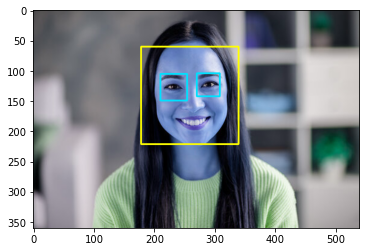

In [114]:
plt.imshow(img)

()


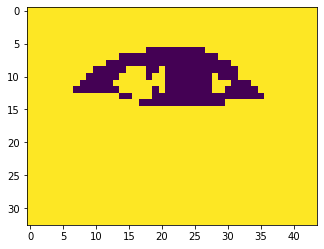

In [117]:
from utils import remove_eyebrows, find_eye_keypoints

# OK, so for debugging i'm only looking at the left eye
eye = eye_frames[0]
eye = remove_eyebrows(eye)
gray_frame = cv2.cvtColor(eye, cv2.COLOR_BGR2GRAY)
_, eye_img = cv2.threshold(gray_frame, 60, 255, cv2.THRESH_BINARY)
# here the detector is not finding any blobs, printing an empty tuple which idk why
keypoints = eye_detector.detect(eye_img)
print(eye_keypoints)

# showing what the gray scale blob looks like
plt.imshow(eye_img)